In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input


from sklearn.metrics import classification_report, confusion_matrix


In [2]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
%store -r X_val
%store -r y_val
%store -r weights


### Add Early Stop

#### Monitor the "val_loss" as metric

In [3]:
import tensorflow as tf

tf.random.set_seed(42)

model_balanced = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),

    Dense(units=1, activation= 'sigmoid')  
])

model_balanced.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                       loss='binary_crossentropy',
                       metrics=['accuracy'])

In [4]:
import tensorflow as tf

#monitor val_loss as metrics 
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=25,
    mode='min',
    restore_best_weights=True,
    verbose=1

)
# This callback will stop the training when there is no improvement in
# the validation loss for 25 consecutive epochs.

In [5]:
history = model_balanced.fit(X_train,
                             y_train,
                             validation_data=(X_val, y_val),
                             batch_size=32,
                             epochs=100,
                             verbose=1,
                             callbacks=[callback],
                             class_weight=weights) 

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.6357 - accuracy: 0.6607 - val_loss: 0.5249 - val_accuracy: 0.7487
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5610 - accuracy: 0.7090 - val_loss: 0.5515 - val_accuracy: 0.7275
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5225 - accuracy: 0.7565 - val_loss: 0.4883 - val_accuracy: 0.7575
Epoch 4/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5104 - accuracy: 0.7521 - val_loss: 0.5917 - val_accuracy: 0.7075
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7615 - val_loss: 0.4822 - val_accuracy: 0.7681
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4923 - accuracy: 0.7754 - val_loss: 0.5221 - val_accuracy: 0.7619
Epoch 7/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4957 - accuracy: 0.7753 - val_loss: 0.4959 - val_accuracy: 0.7600

<Axes: >

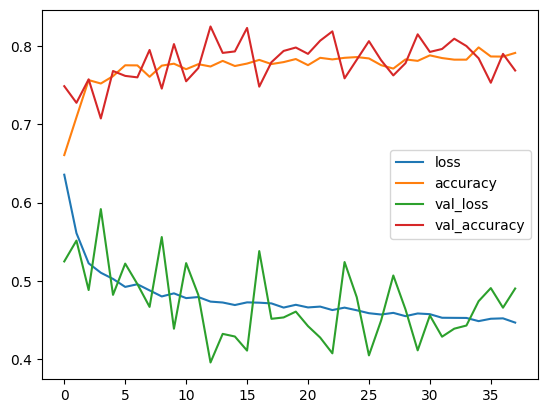

In [6]:
import pandas as pd


pd.DataFrame(history.history).plot()


In [7]:
# history.history['val_loss']


In [8]:
loss, accuracy = model_balanced.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3957926034927368
accuracy:  0.824999988079071


In [9]:


ypred = model_balanced.predict(X_val) > 0.5
# print(confusion_matrix(X_train, y_train))
# print(classification_report(X_train, y_train))



print(confusion_matrix(y_val, ypred))
print(classification_report(y_val, ypred))

50/50 [==============================] - 0s 827us/step
[[1111  163]
 [ 117  209]]
              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1274
           1       0.56      0.64      0.60       326

    accuracy                           0.82      1600
   macro avg       0.73      0.76      0.74      1600
weighted avg       0.83      0.82      0.83      1600



#### Monitor the "val_recall" as metric

In [10]:
tf.random.set_seed(42)

model_balanced = Sequential([
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),

    Dense(1, activation='sigmoid')
])

model_balanced.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
                       loss='binary_crossentropy',
                       metrics=tf.keras.metrics.Recall())

In [11]:
#monitor val_rcall as metrics 
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_recall',
    patience=25,
    mode='max',
    restore_best_weights=True,
    verbose=1

)

In [12]:
history = model_balanced.fit(X_train,
                             y_train,
                             validation_data=(X_val, y_val),
                             batch_size=32,
                             epochs=100,
                             verbose=1,
                             callbacks=[callback]) 

Epoch 1/100
200/200 [==============================] - 1s 2ms/step - loss: 0.4720 - recall: 0.0061 - val_loss: 0.4435 - val_recall: 0.0000e+00
Epoch 2/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4408 - recall: 0.1181 - val_loss: 0.4174 - val_recall: 0.2577
Epoch 3/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4334 - recall: 0.2170 - val_loss: 0.4131 - val_recall: 0.2669
Epoch 4/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4231 - recall: 0.2354 - val_loss: 0.4040 - val_recall: 0.3589
Epoch 5/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4206 - recall: 0.2715 - val_loss: 0.4036 - val_recall: 0.3129
Epoch 6/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4173 - recall: 0.2699 - val_loss: 0.4001 - val_recall: 0.3344
Epoch 7/100
200/200 [==============================] - 0s 1ms/step - loss: 0.4163 - recall: 0.2699 - val_loss: 0.3985 - val_recall: 0.3620
Epoch 8/100
200/200 [==

In [13]:

ypred = model_balanced.predict(X_val) > 0.5
print(confusion_matrix(y_val, ypred))
print(classification_report(y_val, ypred))


50/50 [==============================] - 0s 653us/step
[[1190   84]
 [ 160  166]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      1274
           1       0.66      0.51      0.58       326

    accuracy                           0.85      1600
   macro avg       0.77      0.72      0.74      1600
weighted avg       0.84      0.85      0.84      1600



<Axes: >

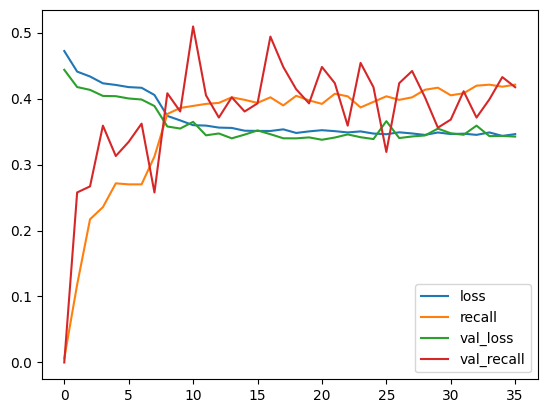

In [14]:
pd.DataFrame(history.history).plot()

<Axes: >

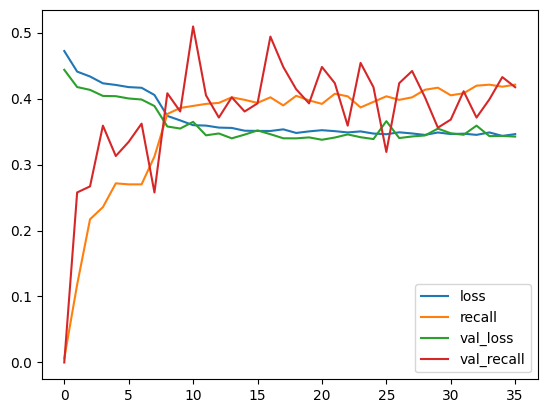

In [15]:
import pandas as pd
pd.DataFrame(history.history).plot()


In [16]:
loss, accuracy = model_balanced.evaluate(X_val, y_val, verbose=0)
print("loss: ", loss)
print("accuracy: ", accuracy)

loss:  0.3646533191204071
accuracy:  0.5092024803161621


In [17]:
%store callback

Stored 'callback' (EarlyStopping)
